#Setting Environment

In [34]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import xml.etree.ElementTree as ET

In [35]:
PATH ='/Dataset/'
img_dir = PATH+"images/Images"
ant_dir = PATH+"annotations/Annotation"

X=[] 
Y=[] 
bnd_dict = {}

#Preprocessing

In [ ]:
label_count = 0
for sub_dir in os.listdir(ant_dir):
    label_count += 1 
    label = sub_dir.split("-")[1]   # 'n02100877-Irish_setter'
    #print(label)
    path=os.path.join(ant_dir,sub_dir)
    for ant in os.listdir(path):
        if ant[0] != 'n': continue
        tree = ET.parse(os.path.join(path,ant))
        root = tree.getroot()
        bndbox = root.find("object").find("bndbox")
        xmin = int(bndbox.findtext("xmin"))
        ymin = int(bndbox.findtext("ymin"))
        xmax = int(bndbox.findtext("xmax"))
        ymax = int(bndbox.findtext("ymax"))
        bnd_dict[ant] = [xmin, ymin, xmax, ymax]
    #if label_count >= 3: break
print(bnd_dict) #'n02085620_12101': [5, 4, 350, 252]

In [38]:
label_count = 0
for sub_dir in os.listdir(img_dir): 
    label_count += 1
    if label_count > 20: break

    label = sub_dir.split("-")[1] #'n02090379-redbone',
    path=os.path.join(img_dir,sub_dir)
    
    for img in os.listdir(path):
        #print(img) #n02099712_1866.jpg
        if img[0] != 'n': continue
        img_array=imread(os.path.join(path,img))
        #imshow(img_array)
        
        bnd = bnd_dict[img.split(".")[0]]
        img_bnd = img_array[bnd[1]:bnd[3],bnd[0]:bnd[2]]
        
        img_resized=resize(img_bnd,(150,150,3))
        
        X.append(img_resized.flatten())
        Y.append(label_count-1)
    print(f'loaded category:{label_count-1} : {label} successfully')
    

loaded category:0 : Blenheim_spaniel successfully
loaded category:1 : papillon successfully
loaded category:2 : toy_terrier successfully
loaded category:3 : Pekinese successfully
loaded category:4 : Rhodesian_ridgeback successfully
loaded category:5 : Afghan_hound successfully
loaded category:6 : Chihuahua successfully
loaded category:7 : Japanese_spaniel successfully
loaded category:8 : Maltese_dog successfully
loaded category:9 : Shih successfully
loaded category:10 : Walker_hound successfully
loaded category:11 : English_foxhound successfully
loaded category:12 : bluetick successfully
loaded category:13 : beagle successfully
loaded category:14 : Irish_wolfhound successfully
loaded category:15 : redbone successfully
loaded category:16 : bloodhound successfully
loaded category:17 : black successfully
loaded category:18 : borzoi successfully
loaded category:19 : basset successfully


In [39]:
X=np.array(X)
Y=np.array(Y)
print(len(X), len(Y))

3633 3633


In [41]:
#import pickle 

###########save
#with open(PATH+'/X.pkl', 'wb') as f:
#    pickle.dump(X, f)
        
#with open(PATH+'/Y.pkl', 'wb') as f:
#    pickle.dump(Y, f)

###########load
#with open(PATH+'/X.pkl', 'rb') as f:
#    X = pickle.load(f)

#with open(PATH+'/Y.pkl', 'rb') as f:
#    Y = pickle.load(f)

In [42]:
X.shape, Y.shape

((3633, 67500), (3633,))

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=77,stratify=Y)
print('Splitted Successfully')
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Splitted Successfully
(2906, 67500) (727, 67500) (2906,) (727,)


#Logistic Regression - One vs Rest

In [ ]:
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,
#                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                   warm_start=False)

In [44]:
lr = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=100)
lr.fit(x_train, y_train)

#Time required to train : 50 mins

LogisticRegression(multi_class='ovr', solver='liblinear')

In [45]:
y_pred = lr.predict(x_test)

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.26      0.23        38
           1       0.16      0.21      0.18        39
           2       0.09      0.06      0.07        34
           3       0.07      0.10      0.09        30
           4       0.17      0.21      0.18        34
           5       0.19      0.21      0.20        48
           6       0.16      0.10      0.12        30
           7       0.16      0.19      0.18        37
           8       0.26      0.55      0.36        51
           9       0.10      0.12      0.11        43
          10       0.07      0.03      0.04        31
          11       0.33      0.29      0.31        31
          12       0.00      0.00      0.00        34
          13       0.16      0.13      0.14        39
          14       0.12      0.16      0.14        44
          15       0.05      0.03      0.04        30
          16       0.22      0.16      0.19        37
          17       0.38    

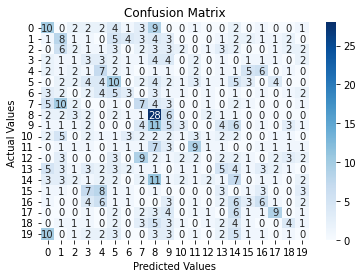

In [55]:
cf_matrix = metrics.confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [57]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy :  17.1939477303989 %


#Logistic Regression - Multinomial

In [47]:
lr_multi = linear_model.LogisticRegression(multi_class='multinomial', solver='saga',  max_iter=100)
lr_multi.fit(x_train, y_train)

#Time required to train : 90 mins

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='multinomial', solver='saga')

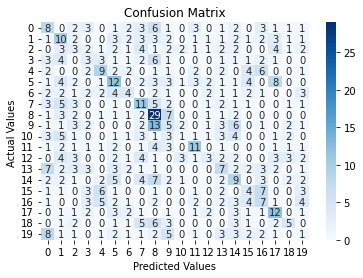

In [56]:
cf_matrix = metrics.confusion_matrix(y_test,y_pred_m)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [48]:
y_pred_m = lr_multi.predict(x_test)

In [49]:
print(metrics.classification_report(y_test, y_pred_m))

              precision    recall  f1-score   support

           0       0.18      0.21      0.19        38
           1       0.20      0.26      0.22        39
           2       0.10      0.09      0.09        34
           3       0.12      0.10      0.11        30
           4       0.28      0.26      0.27        34
           5       0.24      0.25      0.25        48
           6       0.18      0.13      0.15        30
           7       0.22      0.30      0.26        37
           8       0.31      0.57      0.40        51
           9       0.12      0.12      0.12        43
          10       0.10      0.03      0.05        31
          11       0.39      0.35      0.37        31
          12       0.20      0.09      0.12        34
          13       0.19      0.18      0.18        39
          14       0.19      0.20      0.20        44
          15       0.15      0.13      0.14        30
          16       0.18      0.19      0.19        37
          17       0.30    

In [58]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred_m)*100, "%")

Accuracy :  21.182943603851445 %
